### Vaex 

> python library for lazy Out-of-Core DataFrames (similar to Pandas)

In [2]:
import vaex
import pandas as pd
import numpy as np

In [3]:
%load_ext memory_profiler

Data can be downloaded [here](https://drive.google.com/file/d/18f0kxTAbY74nH43vw2RQLJUsH037RAn9/view?usp=sharing).

Conversion from CSV to HDF5 (*Hierarchical Data Format version 5*)

In [4]:
%%time
_ = vaex.from_csv('ts.csv', convert=True, chunk_size=5_000_000, sep=',', header=0,
                  dtype={'date_': str, 'store': str, 'category': str, 'event_type':str, 'x':int})

CPU times: user 1min 11s, sys: 13.1 s, total: 1min 24s
Wall time: 1min 20s


In [5]:
%%time
%memit df = vaex.open('ts.csv.hdf5')

peak memory: 313.39 MiB, increment: 0.18 MiB
CPU times: user 198 ms, sys: 446 ms, total: 644 ms
Wall time: 778 ms


In [21]:
%%time
%memit pddf = pd.read_csv('ts.csv', sep=',', header=0, dtype={'date_': str, 'store': str, 'category': str, 'event_type':str, 'x':int})

peak memory: 4604.79 MiB, increment: 2749.32 MiB
CPU times: user 10.7 s, sys: 1.41 s, total: 12.1 s
Wall time: 12.3 s


In [22]:
df.shape

(35321516, 5)

In [23]:
df.sample(3)

#,date_,store,category,event_type,x
0,2019-03-05,F109,06101018,view,1
1,2018-12-13,F244,02354004,view,4
2,2019-02-16,F300,07103010,order,2


In [24]:
%%time
df.describe()

CPU times: user 1.62 s, sys: 24.2 ms, total: 1.64 s
Wall time: 277 ms


,date_,store,category,event_type,x
dtype,str,str,str,str,int64
count,35321516,35321516,35297657,35321516,35321516
NA,0,0,23859,0,0
mean,--,--,--,--,6.612876298967462
std,--,--,--,--,39.7861
min,--,--,--,--,1
max,--,--,--,--,81441


CPU times: user 1.01 s, sys: 10.5 ms, total: 1.02 s
Wall time: 190 ms


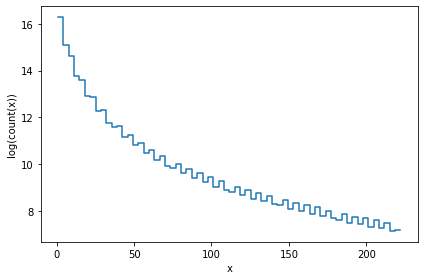

In [25]:
%%time
df.plot1d(df.x, what=np.log(vaex.stat.count(df.x)), limits='99.7%')

In [26]:
df.store.value_counts()

F120    517754
F253    458267
F100    452163
F145    442843
F159    434831
         ...  
F146         2
F140         1
F166         1
F164         1
F163         1
Length: 167, dtype: int64

In [27]:
df.store.unique()

array(['F332', 'F334', 'F336', 'F337', 'F338', 'F522', 'F596', 'F947',
       'F949', 'F278', 'F279', 'F287', 'F300', 'F307', 'F309', 'F313',
       'F314', 'F315', 'F316', 'F317', 'F321', 'F322', 'F323', 'F325',
       'F327', 'F328', 'F329', 'F331', 'F010', 'F033', 'F312', 'F217',
       'F242', 'F945', 'F252', 'F168', 'F035', 'F203', 'F286', 'F007',
       'F012', 'F015', 'F017', 'F018', 'F019', 'F020', 'F022', 'F023',
       'F030', 'F031', 'F034', 'F040', 'F041', 'F100', 'F102', 'F106',
       'F109', 'F114', 'F115', 'F116', 'F117', 'F118', 'F119', 'F120',
       'F208', 'F238', 'F176', 'F271', 'F215', 'F214', 'F245', 'F227',
       'F256', 'F236', 'F536', 'F223', 'F216', 'F204', 'F526', 'F131',
       'F534', 'F220', 'F289', 'F270', 'F205', 'F710', 'F528', 'F219',
       'F943', 'F222', 'F206', 'F524', 'F532', 'F951', 'F530', 'F198',
       'F956', 'S600', 'F952', 'F950', 'F955', 'S190', 'S077', 'S076',
       'F121', 'F122', 'F123', 'F126', 'F127', 'F132', 'F133', 'F135',
      

In [28]:
%%time
orders = df[(df.event_type=='order')][['date_', 'x']].groupby(df.date_, agg='sum')

CPU times: user 5.81 s, sys: 25.7 ms, total: 5.84 s
Wall time: 927 ms


In [29]:
orders['proper_date'] = orders.date_.astype('datetime64')

In [30]:
orders = orders.to_pandas_df().sort_values(["proper_date"], ascending=False)

In [31]:
orders.drop("date_", axis=1, inplace=True)

In [32]:
orders.head(10)

,x_sum,proper_date
4,59506,2019-03-13
90,53224,2019-03-12
295,63524,2019-03-11
522,22664,2019-03-10
384,108686,2019-03-09
204,63882,2019-03-08
250,58551,2019-03-07
499,63706,2019-03-06
163,61809,2019-03-05
210,65677,2019-03-04


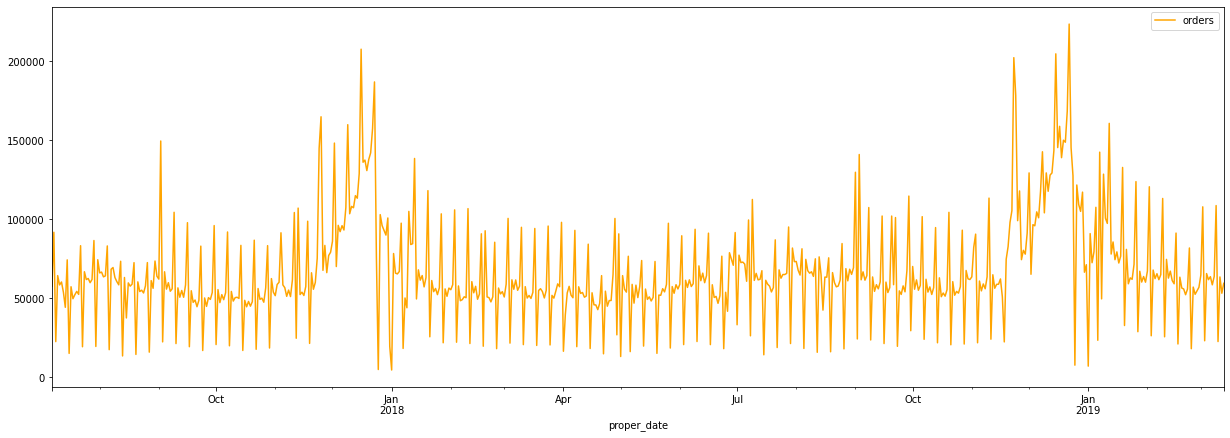

In [33]:
ax1 = orders.plot('proper_date', 'x_sum',figsize=(21,7), label="orders", color="orange")

```bash
sed 's/".*#\([0-9]*\)"/\1/g' ts_0.csv > ts_1.csv
cat ts_1.csv | awk '{ split($1,ARR,","); cat=ARR[3]; sub(".*#","", cat); printf("%s,%s,%s,%s,%s\n", ARR[1], ARR[2], cat, ARR[4], ARR[5]);}' > ts.csv
cat ts.csv | cut -d ',' -f 3 | grep -v -E '[0-9]{8}' | sort | uniq -c
```